<a class="anchor" id="0"></a>
# **W03 - Class Practice (Decision Tree & Naïve Bayes Classification)**

In [366]:
# Import Library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [367]:
df = pd.read_csv('https://raw.githubusercontent.com/NathaliaMinoque/datasets/refs/heads/main/synthetic_coffee_health.csv')
df.head()

,ID,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,1,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,NaN,Other,0,0
1,2,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,NaN,Service,0,0
2,3,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,4,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,5,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### View summary of dataset

In [368]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       10000 non-null  int64  
 1   Age                      10000 non-null  int64  
 2   Gender                   10000 non-null  object 
 3   Country                  10000 non-null  object 
 4   Coffee_Intake            10000 non-null  float64
 5   Caffeine_mg              10000 non-null  float64
 6   Sleep_Hours              10000 non-null  float64
 7   Sleep_Quality            10000 non-null  object 
 8   BMI                      10000 non-null  float64
 9   Heart_Rate               10000 non-null  int64  
 10  Stress_Level             10000 non-null  object 
 11  Physical_Activity_Hours  10000 non-null  float64
 12  Health_Issues            4059 non-null   object 
 13  Occupation               10000 non-null  object 
 14  Smoking                

### Summary of variables


- There are 15 variables in the dataset. 6 variables are categorical data type, 2 variables are boolean data type, and the rest are numerical (integer & float) data type.


- `Age`, `Gender`, `Country`, `Coffee_Intake`, `Caffeine_mg`, `Sleep_Hours`, `Sleep_Quality`, `BMI`, `Heart_Rate`, `Stress_Level`, `Physical_Activity_Hours`, `Occupation`, `Smoking`, and `Alcohol_Consumption` are the input variable.


- `Health_Issues` is the target variable.

In [369]:
df.describe()

,ID,Age,Coffee_Intake,Caffeine_mg,Sleep_Hours,BMI,Heart_Rate,Physical_Activity_Hours,Smoking,Alcohol_Consumption
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.00000,10000.000000
mean,5000.50000,34.949100,2.509230,238.411010,6.636220,23.986860,70.617800,7.48704,0.20040,0.300700
std,2886.89568,11.160939,1.450248,137.748815,1.222055,3.906411,9.822951,4.31518,0.40032,0.458585
min,1.00000,18.000000,0.000000,0.000000,3.000000,15.000000,50.000000,0.00000,0.00000,0.000000
25%,2500.75000,26.000000,1.500000,138.750000,5.800000,21.300000,64.000000,3.70000,0.00000,0.000000
50%,5000.50000,34.000000,2.500000,235.400000,6.600000,24.000000,71.000000,7.50000,0.00000,0.000000
75%,7500.25000,43.000000,3.500000,332.025000,7.500000,26.600000,77.000000,11.20000,0.00000,1.000000
max,10000.00000,80.000000,8.200000,780.300000,10.000000,38.200000,109.000000,15.00000,1.00000,1.000000


From the descriptive statistics above, it can be seen that, overall, the dataset does not show any apparent outliers or anomalies.

### Handle missing values in `Health_Issues`

In [370]:
df = df.fillna('None')

In [371]:
df = df.drop('ID', axis=1, errors='ignore')
df.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
0,40,Male,Germany,3.5,328.1,7.5,Good,24.9,78,Low,14.5,None,Other,0,0
1,33,Male,Germany,1.0,94.1,6.2,Good,20.0,67,Low,11.0,None,Service,0,0
2,42,Male,Brazil,5.3,503.7,5.9,Fair,22.7,59,Medium,11.2,Mild,Office,0,0
3,53,Male,Germany,2.6,249.2,7.3,Good,24.7,71,Low,6.6,Mild,Other,0,0
4,32,Female,Spain,3.1,298.0,5.3,Fair,24.1,76,Medium,8.5,Mild,Student,0,1


### Frequency distribution of values in variables

Now, I will check the frequency counts of categorical variables.

In [372]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
    print(df[col].value_counts())

Gender
Female    5001
Male      4773
Other      226
Name: count, dtype: int64
Country
Canada         543
India          524
Norway         523
China          521
UK             519
Sweden         513
South Korea    512
Finland        510
Italy          509
Switzerland    500
France         499
Germany        497
Australia      497
Belgium        497
Netherlands    494
Spain          486
Mexico         483
Japan          469
Brazil         456
USA            448
Name: count, dtype: int64
Sleep_Quality
Good         5637
Fair         2050
Excellent    1352
Poor          961
Name: count, dtype: int64
Stress_Level
Low       6989
Medium    2050
High       961
Name: count, dtype: int64
Health_Issues
None        5941
Mild        3579
Moderate     463
Severe        17
Name: count, dtype: int64
Occupation
Office        2073
Other         2038
Student       1968
Healthcare    1964
Service       1957
Name: count, dtype: int64
Smoking
0    7996
1    2004
Name: count, dtype: int64
Alcohol_Consumptio

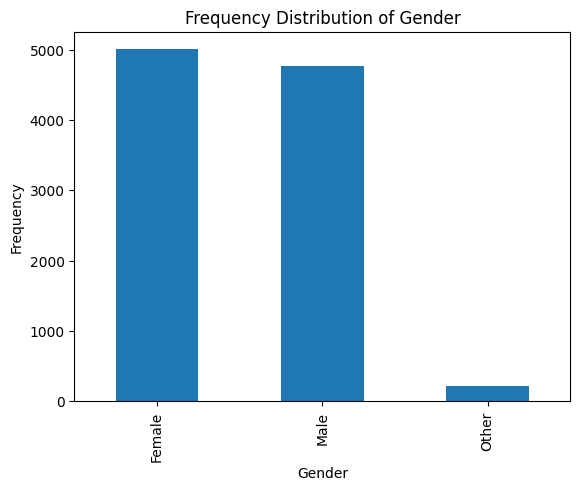

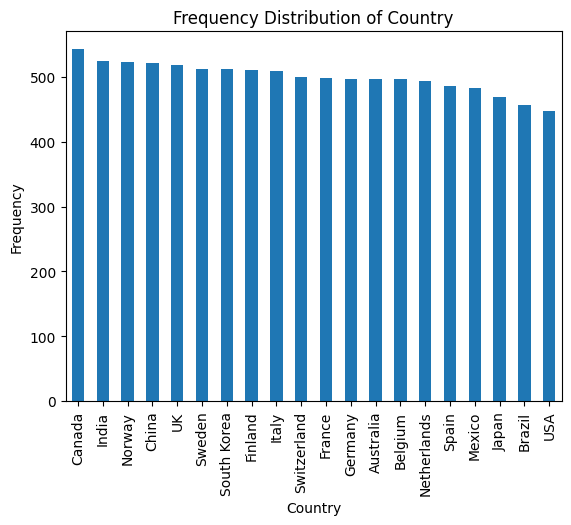

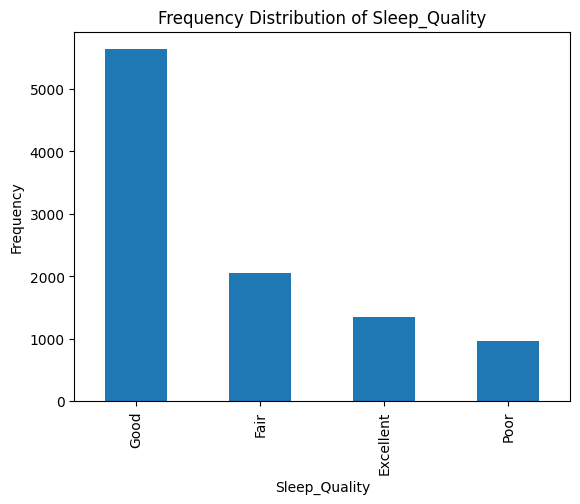

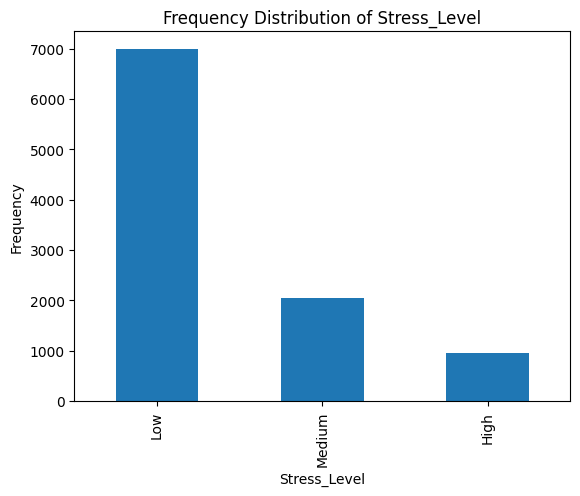

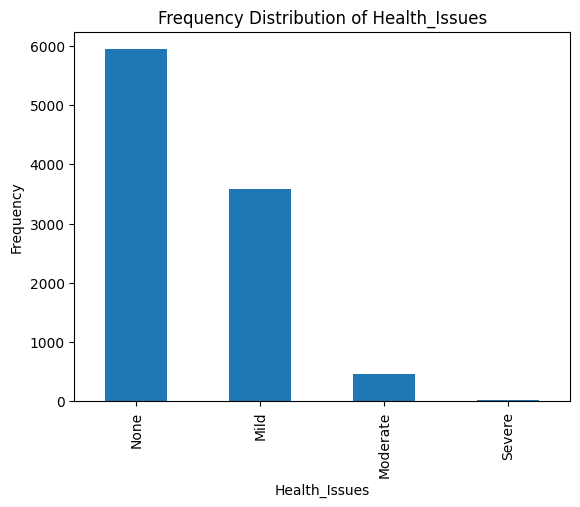

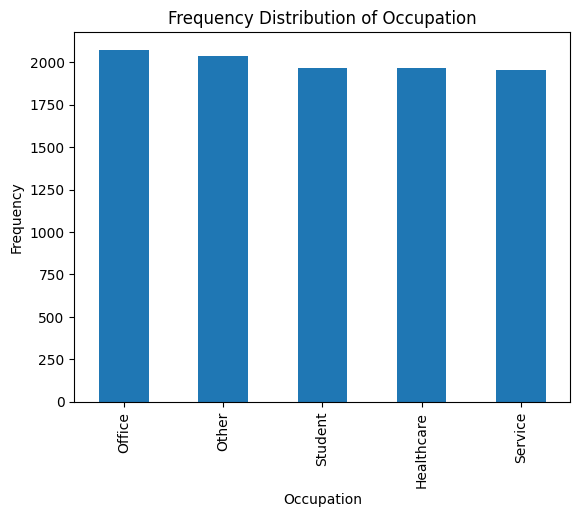

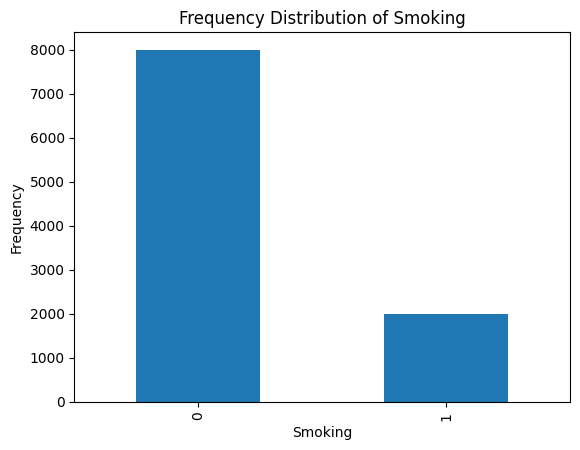

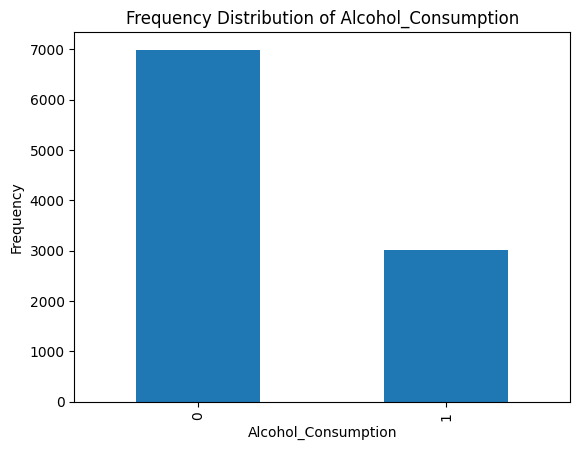

In [373]:
col_names = ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']

for col in col_names:
  df[col].value_counts().plot(kind='bar')
  plt.title(f"Frequency Distribution of {col}")
  plt.xlabel(col)
  plt.ylabel("Frequency")
  plt.show()

### Explore `Health_Issues` variable

In [374]:
df['Health_Issues'].value_counts()

,count
Health_Issues,
None,5941
Mild,3579
Moderate,463
Severe,17


The `Health_Issues` target variable is ordinal in nature.

### Missing values in variables

In [375]:
# check missing values in variables

df.isnull().sum()

,0
Age,0
Gender,0
Country,0
Coffee_Intake,0
Caffeine_mg,0
Sleep_Hours,0
Sleep_Quality,0
BMI,0
Heart_Rate,0
Stress_Level,0


We can see that there are no missing values in the dataset. I have checked the frequency distribution of values previously. It also confirms that there are no missing values in the dataset.

We can see that some of the variables are nominal & ordinal categorical data type.

### Exploratory Data Analysis (EDA)

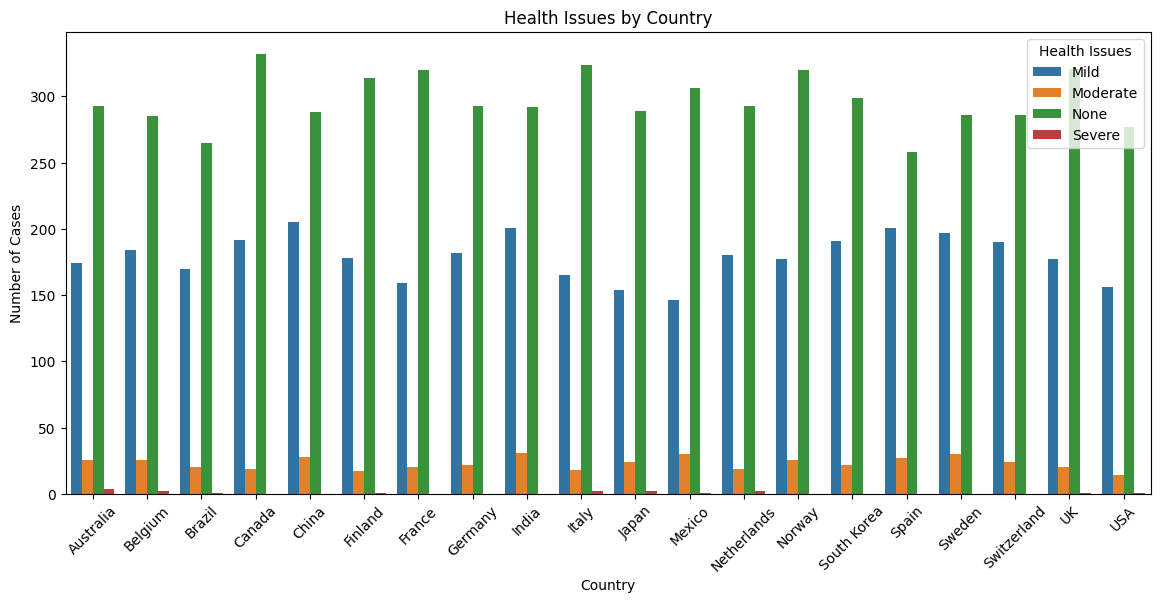

In [376]:
# Health_Issues Group by Country Bar Plot

# Count of Health Issues per Country
health_country = df.groupby(['Country', 'Health_Issues']).size().reset_index(name='Count')

# Bar plot
plt.figure(figsize=(14,6))
sns.barplot(x='Country', y='Count', hue='Health_Issues', data=health_country)
plt.title('Health Issues by Country')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.xticks(rotation=45)
plt.legend(title='Health Issues')
plt.show()

**Key Insights:**

*   Most People Have No Health Issues (Green bars)<br>
In every country, the "None" category has the highest number of cases.
This suggests that the majority of the population across all countries does not report any health issues.

*   Mild Health Issues are Second Most Common (Blue bars)<br>
The second tallest bars are consistently the "Mild" category.
Indicates a significant portion of people experience minor health issues, although far fewer than those reporting no issues.

*   Moderate Health Issues are Noticeably Less (Orange bars)<br>
The "Moderate" category is visibly lower than "Mild", but still consistently present.
This shows that moderate health issues are less frequent, but not negligible.

*   Severe Health Issues are Rare (Red bars)<br>
The "Severe" category has very few cases across all countries, often barely visible on the plot.
This indicates that severe health conditions are rare, relative to other categories.

**Country Comparison:**


*   China, India, Germany, and Mexico seem to have higher numbers across all categories, likely due to larger populations or sample sizes.
*   Japan, Finland, and Norway appear to have fewer Mild/Moderate cases relative to others, potentially indicating better health outcomes or smaller populations.

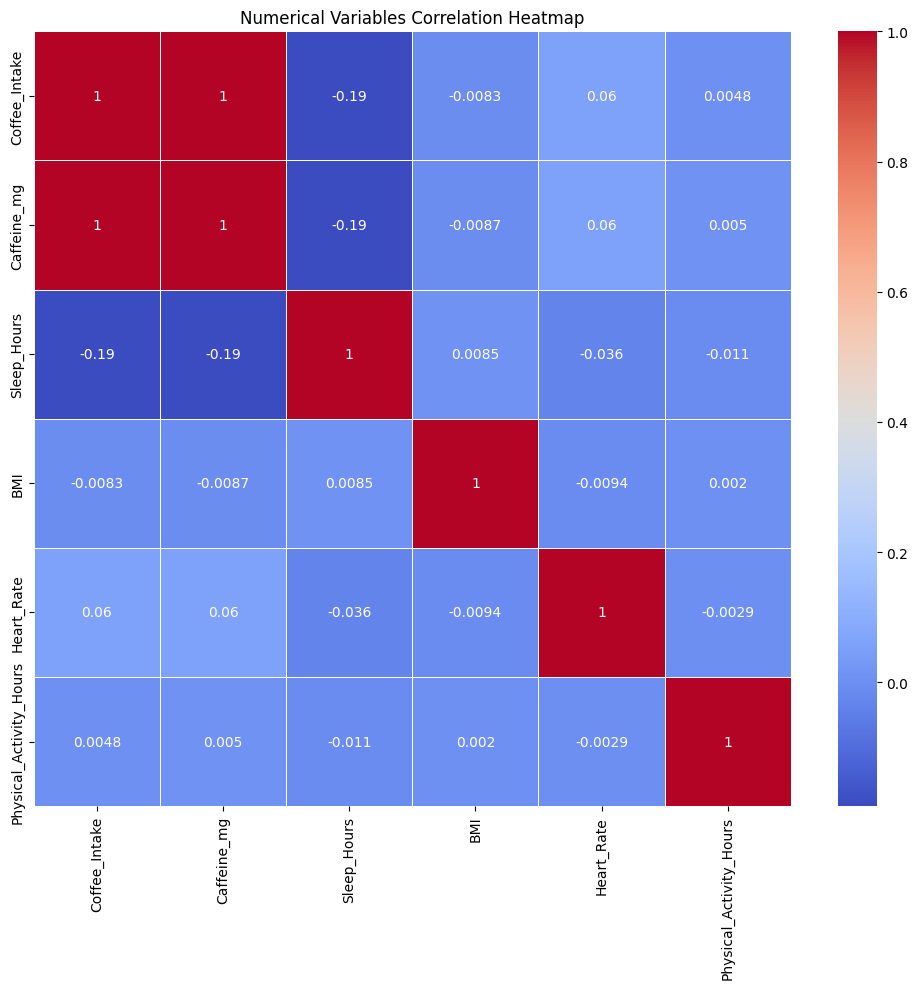

In [377]:
# Numerical Variables Correlation Heatmap
numerical_features = [
    'Coffee_Intake',
    'Caffeine_mg',
    'Sleep_Hours',
    'BMI',
    'Heart_Rate',
    'Physical_Activity_Hours'
]

correlation_matrix = df[numerical_features].corr()

# Heatmap plot
plt.figure(figsize=(10, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Numerical Variables Correlation Heatmap")
plt.tight_layout()
plt.show()

The heatmap shows correlations among numerical variables related to lifestyle and health. Coffee intake and caffeine (mg) are perfectly correlated, as expected, since caffeine comes directly from coffee consumption. Sleep hours show a slight negative correlation with coffee and caffeine, suggesting higher intake may be linked to reduced sleep, though the relationship is weak. Other variables, including BMI, heart rate, and physical activity hours, show near-zero correlations with coffee, caffeine, and sleep, indicating no strong linear relationships. Overall, the key finding is that coffee and caffeine are tightly linked, while other health variables appear largely independent in this dataset.

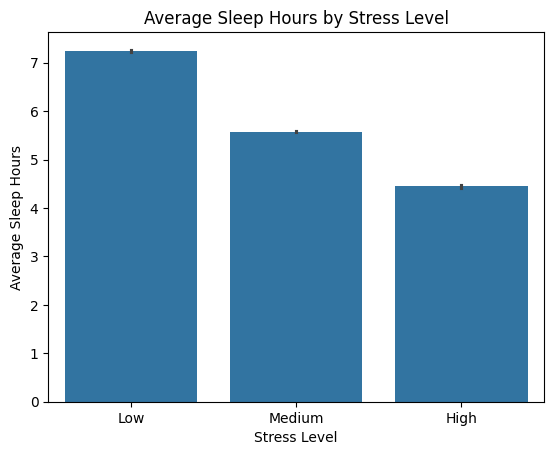

In [378]:
# Average Sleep Hours by Stress Level Bar Plot
sns.barplot(x='Stress_Level', y='Sleep_Hours', data=df)
plt.title("Average Sleep Hours by Stress Level")
plt.xlabel("Stress Level")
plt.ylabel("Average Sleep Hours")
plt.show()

The bar chart shows a clear negative relationship between stress level and average sleep hours. Individuals with low stress sleep the most, averaging over 7 hours per night. Those with medium stress sleep less, around 5.5 hours, while highly stressed individuals average only about 4.5 hours of sleep. This suggests that higher stress levels are strongly associated with reduced sleep duration, highlighting stress as a potential factor negatively impacting sleep quality and quantity.

### Encode categorical variables


Now, I will encode the categorical variables.

In [379]:
for column in ['Gender', 'Country', 'Sleep_Quality', 'Stress_Level', 'Health_Issues', 'Occupation', 'Smoking', 'Alcohol_Consumption']:
  print(df[column].unique())

['Male' 'Female' 'Other']
['Germany' 'Brazil' 'Spain' 'Mexico' 'France' 'Canada' 'UK' 'Switzerland'
 'Netherlands' 'Italy' 'China' 'Japan' 'Belgium' 'Finland' 'Australia'
 'USA' 'Sweden' 'India' 'Norway' 'South Korea']
['Good' 'Fair' 'Excellent' 'Poor']
['Low' 'Medium' 'High']
['None' 'Mild' 'Moderate' 'Severe']
['Other' 'Service' 'Office' 'Student' 'Healthcare']
[0 1]
[0 1]


In [380]:
# Encoding for ordinal column
gender_map = {'Other': 3, 'Female': 2, 'Male': 1}
country_map = {'South Korea': 20, 'Norway': 19, 'India': 18, 'Sweden': 17, 'USA': 16, 'Australia': 15, 'Finland': 14, 'Belgium': 13, 'Japan': 12, 'China': 11,
               'Italy': 10, 'Netherlands': 9, 'Switzerland': 8, 'UK': 7, 'Canada': 6, 'France': 5, 'Mexico': 4, 'Spain': 3, 'Brazil': 2, 'Germany': 1}
sleep_quality_map = {'Excellent': 4, 'Good': 3, 'Fair': 2, 'Poor': 1}
stress_level_map = {'Low': 3, 'Medium': 2, 'High': 1}
health_issues_map = {'None': 4, 'Mild': 3, 'Moderate': 2, 'Severe': 1}
occupation_map = {'Other': 5, 'Service': 4, 'Office': 3, 'Student': 2, 'Healthcare': 1}
binary_map = {'Yes': 1, 'No': 0}

df['Gender'] = df['Gender'].map(gender_map)
df['Country'] = df['Country'].map(country_map)
df['Sleep_Quality'] = df['Sleep_Quality'].map(sleep_quality_map)
df['Stress_Level'] = df['Stress_Level'].map(stress_level_map)
df['Health_Issues'] = df['Health_Issues'].map(health_issues_map)
df['Occupation'] = df['Occupation'].map(occupation_map)

df.sample(n = 5)

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Health_Issues,Occupation,Smoking,Alcohol_Consumption
3460,55,2,20,1.8,168.5,6.5,3,27.5,74,3,2.2,3,3,0,1
1234,25,2,12,1.8,170.5,7.0,3,24.4,74,3,6.4,4,2,0,1
6448,18,1,7,3.2,301.2,6.6,3,21.5,93,3,5.5,4,4,1,1
4840,25,1,9,3.2,303.9,7.5,3,28.1,87,3,9.1,4,2,1,0
7438,18,2,8,0.3,31.8,7.8,3,30.1,72,3,1.4,3,1,0,1


# **Declare feature vector and target variable** <a class="anchor" id="10"></a>


In [381]:
X = df.drop(['Health_Issues'], axis=1)

y = df['Health_Issues']

In [382]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,3,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,3,11.0,4,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,3,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,2,0,1


In [383]:
y.head()

,Health_Issues
0,4
1,4
2,3
3,3
4,3


# **Split data into separate training and test set** <a class="anchor" id="11"></a>

In [384]:
# split X and y into training and testing sets

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [385]:
# check the shape of X_train and X_test

X_train.shape, X_test.shape

((8000, 14), (2000, 14))

In [386]:
X_train.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
9254,37,1,3,4.3,405.6,5.4,2,18.0,86,2,2.4,4,0,1
1561,26,1,18,0.0,0.0,5.5,2,28.3,75,2,10.8,5,0,0
1670,32,1,20,2.8,268.1,7.3,3,27.4,69,3,8.6,3,0,0
6087,18,1,20,2.2,208.6,8.1,4,16.3,83,3,8.9,5,0,1
6669,43,2,7,2.6,251.1,9.4,4,25.4,68,3,3.4,3,0,0


In [387]:
X_test.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
6252,66,1,19,2.6,245.9,6.7,3,30.1,76,3,1.9,4,0,1
4684,22,2,4,3.1,293.1,7.6,3,20.4,69,3,5.0,4,0,0
1731,30,1,15,3.9,372.4,6.4,3,27.5,75,3,13.8,3,0,0
4742,35,1,1,1.0,92.5,5.3,2,23.1,71,2,2.4,4,0,0
4521,47,1,10,1.3,119.0,6.9,3,28.4,64,3,9.6,3,1,0


We now have training and test set ready for model building.

# **Decision Tree Classifier with criterion gini index** <a class="anchor" id="13"></a>


In [388]:
# import DecisionTreeClassifier

from sklearn.tree import DecisionTreeClassifier

In [389]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=6, random_state=0)

clf_gini.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6, random_state=0)

### Predict the Test set results with criterion gini index

In [390]:
y_pred_gini = clf_gini.predict(X_test)

### Check accuracy score with criterion gini index

In [391]:
from sklearn.metrics import accuracy_score

gini_accuracy = accuracy_score(y_test, y_pred_gini)
print('Model accuracy score with criterion gini index: {0:0.4f}'. format(gini_accuracy))

Model accuracy score with criterion gini index: 0.9980


Here, **y_test** are the true class labels and **y_pred_gini** are the predicted class labels in the test-set.

### Visualize decision-trees

[Text(0.5, 0.9285714285714286, 'x[6] <= 2.5\ngini = 0.519\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\ngini = 0.253\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\ngini = 0.118\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'gini = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\ngini = 0.079\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\ngini = 0.49\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 12.5\ngini = 0.397\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'gini = 0.375\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'gini = 0.0\nsamples = 7\nvalue = [0, 7, 0, 0]'),
 Text(0.25, 

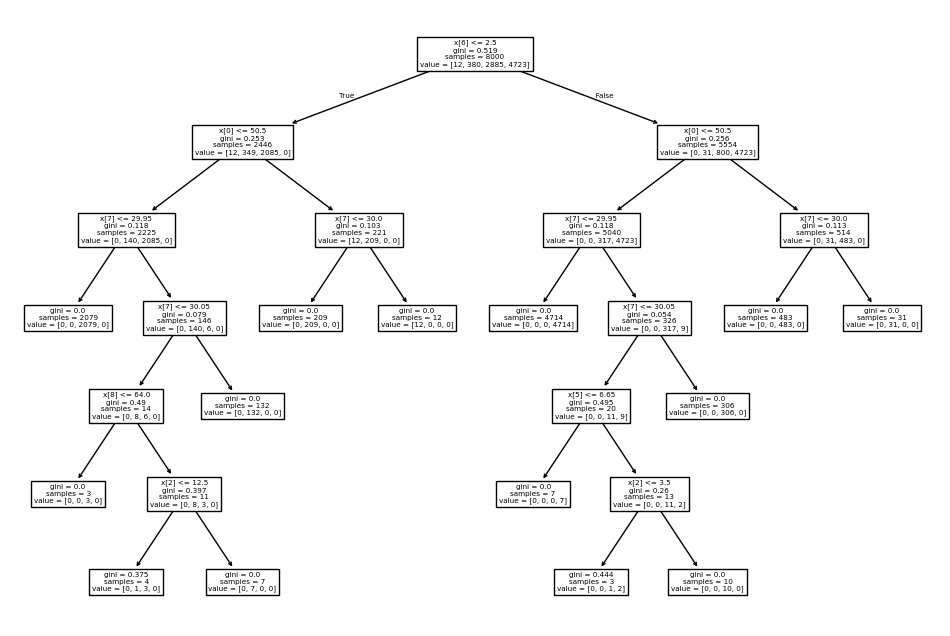

In [392]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_gini.fit(X_train, y_train))

# **Decision Tree Classifier with criterion entropy** <a class="anchor" id="14"></a>


In [393]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=0)

### Predict the Test set results with criterion entropy

In [394]:
y_pred_en = clf_en.predict(X_test)

### Check accuracy score with criterion entropy

In [395]:
from sklearn.metrics import accuracy_score

entropy_accuracy = accuracy_score(y_test, y_pred_en)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(entropy_accuracy))

Model accuracy score with criterion entropy: 0.9980


### Visualize decision-trees

[Text(0.5, 0.9285714285714286, 'x[6] <= 2.5\nentropy = 1.202\nsamples = 8000\nvalue = [12, 380, 2885, 4723]'),
 Text(0.25, 0.7857142857142857, 'x[0] <= 50.5\nentropy = 0.635\nsamples = 2446\nvalue = [12, 349, 2085, 0]'),
 Text(0.375, 0.8571428571428572, 'True  '),
 Text(0.125, 0.6428571428571429, 'x[7] <= 29.95\nentropy = 0.339\nsamples = 2225\nvalue = [0, 140, 2085, 0]'),
 Text(0.0625, 0.5, 'entropy = 0.0\nsamples = 2079\nvalue = [0, 0, 2079, 0]'),
 Text(0.1875, 0.5, 'x[7] <= 30.05\nentropy = 0.247\nsamples = 146\nvalue = [0, 140, 6, 0]'),
 Text(0.125, 0.35714285714285715, 'x[8] <= 64.0\nentropy = 0.985\nsamples = 14\nvalue = [0, 8, 6, 0]'),
 Text(0.0625, 0.21428571428571427, 'entropy = 0.0\nsamples = 3\nvalue = [0, 0, 3, 0]'),
 Text(0.1875, 0.21428571428571427, 'x[2] <= 12.5\nentropy = 0.845\nsamples = 11\nvalue = [0, 8, 3, 0]'),
 Text(0.125, 0.07142857142857142, 'entropy = 0.811\nsamples = 4\nvalue = [0, 1, 3, 0]'),
 Text(0.25, 0.07142857142857142, 'entropy = 0.0\nsamples = 7\nvalue

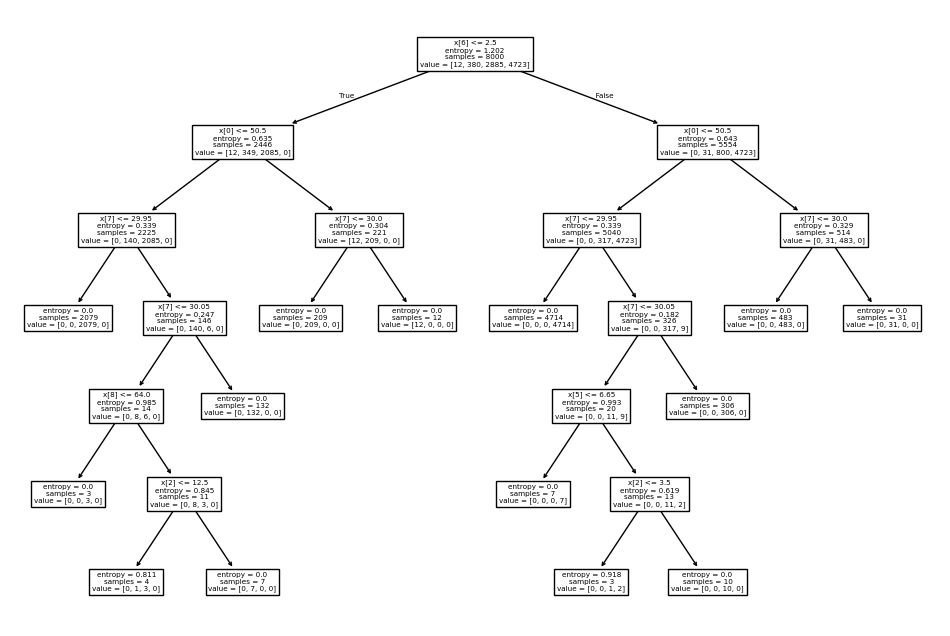

In [396]:
plt.figure(figsize=(12,8))

from sklearn import tree

tree.plot_tree(clf_en.fit(X_train, y_train))

# **Naive Bayes** <a class="anchor" id="16"></a>

In [397]:
from sklearn.naive_bayes import GaussianNB

nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)

GaussianNB()

In [398]:
y_pred_nb = nb_classifier.predict(X_test)

### Check accuracy score with naive bayes

In [399]:
from sklearn.metrics import accuracy_score

nb_accuracy = accuracy_score(y_test, y_pred_nb)

print('Model accuracy score with naive bayes: {0:0.4f}'. format(nb_accuracy))

Model accuracy score with naive bayes: 0.8570


# **Accuracy Comparison** <a class="anchor" id="16"></a>

In [400]:
# Make dictionary
data = {
    'Metrics': ['Gini', 'Entropy', 'Naive Bayes'],
    'Accuracy': [gini_accuracy, entropy_accuracy, nb_accuracy]
}

accuracy_comparison = pd.DataFrame(data)
accuracy_comparison

,Metrics,Accuracy
0,Gini,0.998
1,Entropy,0.998
2,Naive Bayes,0.857


From the data, we can see that the Decision Tree is more accurate than Naive Bayes. This can be proven by its higher accuracy value (0.998 > 0.857).

# **Classification Report** <a class="anchor" id="16"></a>



**Classification report** is another way to evaluate the classification model performance. It displays the  **precision**, **recall**, **f1** and **support** scores for the model. I have described these terms in later.

We can print a classification report as follows:

In [401]:
# DECISION TREE GINI
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred_gini))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.99      0.99        83
           3       0.99      1.00      1.00       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [402]:
# DECISION TREE ENTROPY
print(classification_report(y_test, y_pred_en))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00         5
           2       1.00      0.99      0.99        83
           3       0.99      1.00      1.00       694
           4       1.00      1.00      1.00      1218

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



In [403]:
# DECISION TREE NAIVE BAYES
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00         5
           2       0.71      0.14      0.24        83
           3       0.88      0.70      0.78       694
           4       0.85      1.00      0.92      1218

    accuracy                           0.86      2000
   macro avg       0.61      0.46      0.48      2000
weighted avg       0.85      0.86      0.84      2000



# **Prediction for Unlabeled Record** <a class="anchor" id="16"></a>

In [404]:
X.head()

,Age,Gender,Country,Coffee_Intake,Caffeine_mg,Sleep_Hours,Sleep_Quality,BMI,Heart_Rate,Stress_Level,Physical_Activity_Hours,Occupation,Smoking,Alcohol_Consumption
0,40,1,1,3.5,328.1,7.5,3,24.9,78,3,14.5,5,0,0
1,33,1,1,1.0,94.1,6.2,3,20.0,67,3,11.0,4,0,0
2,42,1,2,5.3,503.7,5.9,2,22.7,59,2,11.2,3,0,0
3,53,1,1,2.6,249.2,7.3,3,24.7,71,3,6.6,5,0,0
4,32,2,3,3.1,298.0,5.3,2,24.1,76,2,8.5,2,0,1


In [405]:
# Make a prediction with the gini index model

# Input values: buying high, maint low, doors 4, persons 2, lug_boot med, safety low
# These values need to be encoded according to the maps created earlier
input_data = {
    'Age': 28,
    'Gender': gender_map['Male'],
    'Country': country_map['Brazil'],
    'Coffee_Intake': 3,
    'Caffeine_mg': 280,
    'Sleep_Hours': 5,
    'Sleep_Quality': sleep_quality_map['Poor'],
    'BMI': 25.4,
    'Heart_Rate': 85,
    'Stress_Level': stress_level_map['High'],
    'Physical_Activity_Hours': 2,
    'Occupation': occupation_map['Student'],
    'Smoking': binary_map['Yes'],
    'Alcohol_Consumption': binary_map['Yes']
}

# Convert the input data to a pandas DataFrame
input_df = pd.DataFrame([input_data])

# Make the prediction using the gini model
prediction_gini = clf_gini.predict(input_df)

print("Prediction:", prediction_gini[0])

# To get the inverse, we can use the class_map to get the original label
# This was already done in the previous step to print the predicted class.
# class_map = {'unacc': 1, 'acc': 2, 'good': 3, 'vgood': 4}
# class_map.items() → mengembalikan pasangan (key, value) misalnya ('unacc',0).
# {v:k for k,v in class_map.items()} → menukar posisi key & value.
# inv_class_map = {1: 'unacc', 2: 'acc', 3: 'good', 4: 'vgood'}

# reverse dictionary
inverse_prediction_gini = {v:k for k,v in health_issues_map.items()}

print(f"The predicted class for the given input using the gini index model is: {inverse_prediction_gini[prediction_gini[0]]}")

Prediction: 3
The predicted class for the given input using the gini index model is: Mild
